* **Data preprocessing:**

  * Encoded categorical variables (`Area Type`, `City`, `Furnishing Status`, `Tenant Preferred`) as numeric.
  * Extracted numeric floor information from the `Floor` column.
  * Dropped rows with missing values.

* **Regression model:**
$$
  Rent = \beta_0 + \beta_1 \cdot BHK + \beta_2 \cdot Size + \beta_3 \cdot Floor_num + \dots + \epsilon
$$

* **Evaluation metrics:** RSS, RMSE, RSE, R² to assess model fit.

* **Visualization:** Scatterplot of `Rent` vs `Size` with regression line.

* **Forecasting:** Predict rent for 3 hypothetical new properties.



In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

### 1. Load the dataset

In [113]:
df = pd.read_csv('House_Rent_Dataset.csv')

### 2. Inspect dataset

In [114]:
print(df.head())
print(df.info())
print(df.isna().sum())  # check missing values

    Posted On  BHK   Rent  Size            Floor    Area Type  \
0  2022-05-18    2  10000  1100  Ground out of 2   Super Area   
1  2022-05-13    2  20000   800       1 out of 3   Super Area   
2  2022-05-16    2  17000  1000       1 out of 3   Super Area   
3  2022-07-04    2  10000   800       1 out of 2   Super Area   
4  2022-05-09    2   7500   850       1 out of 2  Carpet Area   

              Area Locality     City Furnishing Status  Tenant Preferred  \
0                    Bandel  Kolkata       Unfurnished  Bachelors/Family   
1  Phool Bagan, Kankurgachi  Kolkata    Semi-Furnished  Bachelors/Family   
2   Salt Lake City Sector 2  Kolkata    Semi-Furnished  Bachelors/Family   
3               Dumdum Park  Kolkata       Unfurnished  Bachelors/Family   
4             South Dum Dum  Kolkata       Unfurnished         Bachelors   

   Bathroom Point of Contact  
0         2    Contact Owner  
1         1    Contact Owner  
2         1    Contact Owner  
3         1    Contact Owner

### 3. Data preprocessing

In [115]:
# Encode categorical variables
le_area_type = LabelEncoder()
df['Area Type'] = le_area_type.fit_transform(df['Area Type'])

le_city = LabelEncoder()
df['City'] = le_city.fit_transform(df['City'])

le_furnishing = LabelEncoder()
df['Furnishing Status'] = le_furnishing.fit_transform(df['Furnishing Status'])

le_tenant = LabelEncoder()
df['Tenant Preferred'] = le_tenant.fit_transform(df['Tenant Preferred'])

# Extract numeric floor information
# "Ground out of 2" -> Ground=0, "1 out of 3" -> 1, etc.
def extract_floor(floor_str):
    if pd.isna(floor_str):
        return np.nan
    if 'Ground' in floor_str:
        return 0
    try:
        return int(floor_str.split(' ')[0])
    except:
        return np.nan

df['Floor_num'] = df['Floor'].apply(extract_floor)

# Drop rows with missing values
df = df.dropna()

### 4. Select predictors (X) and target (y)

In [116]:
X = df[['BHK', 'Size', 'Floor_num', 'Area Type', 'City', 'Furnishing Status', 'Tenant Preferred', 'Bathroom']]
y = df['Rent']

### 5. Fit the multiple linear regression model

In [117]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

### 6. Display regression coefficients

In [118]:
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient (β)': model.coef_
})
intercept = model.intercept_

print("Intercept (β0):", intercept)
print(coefficients)

Intercept (β0): -14145.74741723256
             Feature  Coefficient (β)
0                BHK      -707.260906
1               Size        31.794799
2          Floor_num      2221.615931
3          Area Type    -12481.880781
4               City      5491.251838
5  Furnishing Status     -6201.037592
6   Tenant Preferred     -3299.411756
7           Bathroom     14360.665546


### 7. Make predictions on the dataset

In [119]:
y_pred = model.predict(X)

### 8. Calculate evaluation metrics

In [120]:
RSS = np.sum((y - y_pred)**2)
RMSE = np.sqrt(mean_squared_error(y, y_pred))
n = X.shape[0]
p = X.shape[1]
RSE = np.sqrt(RSS / (n - p - 1))
R2 = r2_score(y, y_pred)

print(f"RSS: {RSS:.2f}")
print(f"RMSE: {RMSE:.2f}")
print(f"RSE: {RSE:.2f}")
print(f"R^2: {R2:.2f}")

RSS: 20660110094165.51
RMSE: 66216.11
RSE: 66279.44
R^2: 0.28


### 9. Visualize regression

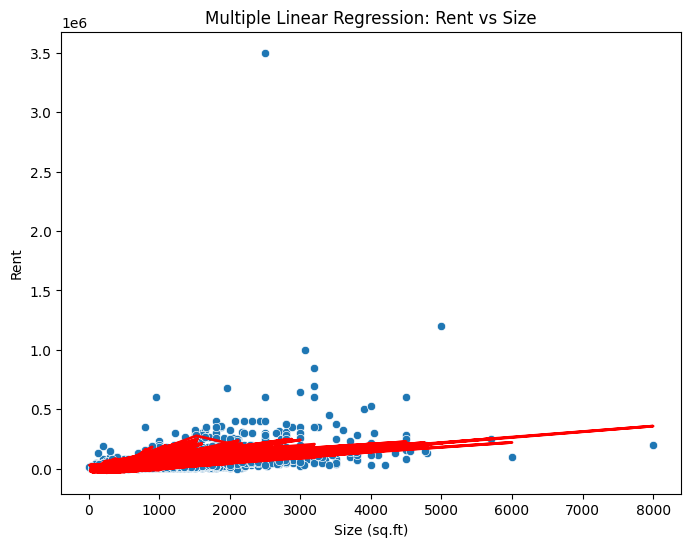

In [121]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Size', y='Rent', data=df)
plt.plot(df['Size'], y_pred, color='red', linewidth=2)
plt.title('Multiple Linear Regression: Rent vs Size')
plt.xlabel('Size (sq.ft)')
plt.ylabel('Rent')
plt.show()

### 10. Forecasting 3 new properties

In [122]:
future_data = pd.DataFrame({
    'BHK': [2, 3, 1],
    'Size': [900, 1500, 400],
    'Floor_num': [1, 2, 0],
    'Area Type': le_area_type.transform(['Super Area', 'Carpet Area', 'Super Area']),
    'City': le_city.transform(['Kolkata', 'Kolkata', 'Kolkata']),
    'Furnishing Status': le_furnishing.transform(['Unfurnished', 'Semi-Furnished', 'Unfurnished']),
    'Tenant Preferred': le_tenant.transform(['Bachelors/Family', 'Bachelors', 'Bachelors']),
    'Bathroom': [2, 3, 1]
})

future_pred = model.predict(future_data)
print("Future 3-step rent predictions:", future_pred)

Future 3-step rent predictions: [25297.75575701 82231.98586807 -3175.25256599]
